#**1.Defining Question**

## 1.1 Specifying Question

* The research question is predicting which individuals are most likely to be able and willing to buy an insurance policy
* Provide an indication of the district of the insurance inclusion in a few district in Indonesia 
* Provide insights into some of the key demographic factors that might drive individual's ability to pay insurance

## 1.2  Defining the Metric for Success

* The following areas will be covered to successfully achieve the objectives of the project:

* Exploratory Data Analysis
* Univariate, Bivariate and Multivariate analysis
* Visualizations
* Reduction techniques 

##1.3 Understanding the context

Buying insurance is important as it ensures that you are financially secure to face any type of problem in life, and this is why insurance is a very important part of financial planning. This mini project will be exploring the ability and willingness of respondants in Indonesia in March, 2021.

##1.4 Recording the Experimental Design

To successfully conduct this project the following steps will be taken in order:

* Conduct Exploratory Data Analysis
* Univariate, Bivariate and Multivariate analysis
* Create Visualizations
* Apply Reduction techniques 

##1.5 Data Relevance

The data provided fits the context of our study. It contains variables that can be used for our prediction. The main dataset contains demographic information and type of insurance policy (government mandatory or "Jaminan Kesehatan Nasional") are used by the respondants

Dataset: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/5FW8IW

#**2. Reading the dataset**

## 2.1 Importing Libraries

In [188]:
# Importing libraries we will use for our analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
import pandas_profiling as pp
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [189]:
import warnings

warnings.filterwarnings('ignore')  # don't print out warnings

In [190]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
# print('matplotlib version : ',matplotlib.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2


##2.2 Creating a dataframe from dataset

In [191]:
from google.colab import files
uploaded = files.upload()

Saving Ability.xls to Ability (4).xls


In [192]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Ability.xls']))

##2.3 Viewing the dataset

In [193]:
# viewing the first five entries in the dataset
df.head(5)

,province,district,living_area,fiscal_capacity,age,sex,education,household_size,reason_join_jkn,income_household,income_perkapita,household_total_expend,percapita_expend,expend_healthcare_hh,healthcare_pc,insurance_pc,tobacco_expend_hh,tobacco_expend_pc,smoke,atp_hh,atp_percapita,group_atp,wtp_pbpu,group_wtp,expend_insurance_hh,a090,a091,a092,a093,a094,a095,a096,outpatient_puskesmas,outpatient_clinic,outpatient_hospital,inpatient_puskesmas,inpatient_clinic,inpatient_hospital,satisfaction_puskesmas,satisfaction_familydoc,satisfaction_clinic,satisfaction_hospital
0,51,Badung,rural,high,65,male,Incomplete primary,3,Anticipating sick family member,3500000,1.166667e+06,1668000.0,5.560000e+05,0.0,0.0,0.0,0.0,0.0,0,33500.0,11166.666992,nearly able&able,0,not willing & nearly willing,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2,0,0,0,0,0,satisfied and very satisfied,missing,missing,missing
1,51,Badung,rural,high,58,male,Incomplete primary,3,Anticipating sick family member,1750000,5.833333e+05,1802000.0,6.006667e+05,0.0,0.0,0.0,0.0,0.0,0,61700.0,20566.666016,nearly able&able,0,not willing & nearly willing,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,missing,missing,missing,missing
2,51,Badung,urban,high,27,male,Graduate secondary,2,Mandatory government programme; sick family me...,6150000,3.075000e+06,1268000.0,6.340000e+05,0.0,0.0,0.0,250000.0,125000.0,smoke,27150.0,13575.000000,nearly able&able,0,not willing & nearly willing,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0,0,0,0,1,satisfied and very satisfied,missing,missing,satisfied and very satisfied
3,51,Badung,urban,high,35,female,Graduate secondary,2,Anticipating sick family member,2700000,1.350000e+06,2714000.0,1.357000e+06,0.0,0.0,0.0,0.0,0.0,0,83500.0,41750.000000,nearly able&able,0,not willing & nearly willing,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0,0,0,0,0,missing,missing,missing,missing
4,51,Badung,urban,high,28,male,Graduate secondary,2,Anticipating sick family member,2200000,1.100000e+06,1096000.0,5.480000e+05,0.0,0.0,0.0,0.0,0.0,0,30200.0,15100.000000,nearly able&able,0,not willing & nearly willing,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,0,0,0,0,missing,missing,missing,missing


In [194]:
# # viewing the last five entries in the dataset
df.tail(5)

,province,district,living_area,fiscal_capacity,age,sex,education,household_size,reason_join_jkn,income_household,income_perkapita,household_total_expend,percapita_expend,expend_healthcare_hh,healthcare_pc,insurance_pc,tobacco_expend_hh,tobacco_expend_pc,smoke,atp_hh,atp_percapita,group_atp,wtp_pbpu,group_wtp,expend_insurance_hh,a090,a091,a092,a093,a094,a095,a096,outpatient_puskesmas,outpatient_clinic,outpatient_hospital,inpatient_puskesmas,inpatient_clinic,inpatient_hospital,satisfaction_puskesmas,satisfaction_familydoc,satisfaction_clinic,satisfaction_hospital
1704,72,Tojo Una-Una,rural,low,27,female,Graduate secondary,4,Anticipating sick family member,2550000,637500.0,4132000.0,1033000.0,30000.0,7500.0,25500.0,200000.0,50000.0,smoke,61600.0,15400.0,nearly able&able,0,not willing & nearly willing,102000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,missing,missing,missing,satisfied and very satisfied
1705,72,Tojo Una-Una,rural,low,22,female,Graduate secondary,5,Anticipating sick family member,1300000,260000.0,3680000.0,736000.0,150000.0,30000.0,0.0,180000.0,36000.0,smoke,56000.0,11200.0,nearly able&able,0,not willing & nearly willing,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,1,missing,missing,missing,satisfied and very satisfied
1706,72,Tojo Una-Una,rural,low,38,male,Graduate junior high,5,Mandatory government programme; sick family me...,2000000,400000.0,1580000.0,316000.0,0.0,0.0,0.0,150000.0,30000.0,smoke,48000.0,9600.0,not able,0,not willing & nearly willing,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0,0,0,0,0,satisfied and very satisfied,missing,missing,missing
1707,72,Tojo Una-Una,rural,low,45,female,Graduate junior high,2,Anticipating sick family member,750000,375000.0,1246000.0,623000.0,20000.0,10000.0,0.0,100000.0,50000.0,smoke,23300.0,11650.0,nearly able&able,0,not willing & nearly willing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,satisfied and very satisfied,missing,missing,missing
1708,72,Tojo Una-Una,rural,low,41,female,Graduate junior high,5,Mandatory government programme; sick family me...,1000000,200000.0,1720000.0,344000.0,0.0,0.0,0.0,150000.0,30000.0,smoke,67000.0,13400.0,nearly able&able,10500,not willing & nearly willing,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,missing,missing,missing,satisfied and very satisfied


In [195]:
# Checking whether each column has an appropriate datatype
df.dtypes

province                   object
district                   object
living_area                object
fiscal_capacity            object
age                         int64
sex                        object
education                  object
household_size              int64
reason_join_jkn            object
income_household            int64
income_perkapita          float64
household_total_expend    float64
percapita_expend          float64
expend_healthcare_hh      float64
healthcare_pc             float64
insurance_pc              float64
tobacco_expend_hh         float64
tobacco_expend_pc         float64
smoke                      object
atp_hh                    float64
atp_percapita             float64
group_atp                  object
wtp_pbpu                    int64
group_wtp                  object
expend_insurance_hh       float64
a090                      float64
a091                      float64
a092                      float64
a093                      float64
a094          

In [196]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   province                1709 non-null   object 
 1   district                1709 non-null   object 
 2   living_area             1709 non-null   object 
 3   fiscal_capacity         1709 non-null   object 
 4   age                     1709 non-null   int64  
 5   sex                     1709 non-null   object 
 6   education               1709 non-null   object 
 7   household_size          1709 non-null   int64  
 8   reason_join_jkn         1709 non-null   object 
 9   income_household        1709 non-null   int64  
 10  income_perkapita        1709 non-null   float64
 11  household_total_expend  1709 non-null   float64
 12  percapita_expend        1709 non-null   float64
 13  expend_healthcare_hh    1303 non-null   float64
 14  healthcare_pc           1303 non-null   

In [197]:
# Checking the number of rows and columns

# df.shape

print('This dataset has ' + str(df.shape[0]) + ' rows and ' +  str(df.shape[1]) + ' columns' )

This dataset has 1709 rows and 42 columns


In [198]:
# Checking the columns name
df.columns

Index(['province', 'district', 'living_area', 'fiscal_capacity', 'age', 'sex',
       'education', 'household_size', 'reason_join_jkn', 'income_household',
       'income_perkapita', 'household_total_expend', 'percapita_expend',
       'expend_healthcare_hh', 'healthcare_pc', 'insurance_pc',
       'tobacco_expend_hh', 'tobacco_expend_pc', 'smoke', 'atp_hh',
       'atp_percapita', 'group_atp', 'wtp_pbpu', 'group_wtp',
       'expend_insurance_hh', 'a090', 'a091', 'a092', 'a093', 'a094', 'a095',
       'a096', 'outpatient_puskesmas', 'outpatient_clinic',
       'outpatient_hospital', 'inpatient_puskesmas', 'inpatient_clinic',
       'inpatient_hospital', 'satisfaction_puskesmas',
       'satisfaction_familydoc', 'satisfaction_clinic',
       'satisfaction_hospital'],
      dtype='object')

#**3. Tidying the Datasets**

##3.1 Checking and Handling Missing Values 

In [199]:
# Missing values

# checking the number of missing values by column

df.isnull().sum()

province                     0
district                     0
living_area                  0
fiscal_capacity              0
age                          0
sex                          0
education                    0
household_size               0
reason_join_jkn              0
income_household             0
income_perkapita             0
household_total_expend       0
percapita_expend             0
expend_healthcare_hh       406
healthcare_pc              406
insurance_pc               509
tobacco_expend_hh          384
tobacco_expend_pc          384
smoke                        0
atp_hh                       0
atp_percapita                0
group_atp                    0
wtp_pbpu                     0
group_wtp                    0
expend_insurance_hh        509
a090                       840
a091                      1152
a092                      1130
a093                      1153
a094                      1117
a095                      1097
a096                      1064
outpatie

In [200]:
# Filling all null values in our dataframe

df.fillna(0, inplace = True)

In [201]:
# confriming there are no missing values

df.isnull().sum()

province                  0
district                  0
living_area               0
fiscal_capacity           0
age                       0
sex                       0
education                 0
household_size            0
reason_join_jkn           0
income_household          0
income_perkapita          0
household_total_expend    0
percapita_expend          0
expend_healthcare_hh      0
healthcare_pc             0
insurance_pc              0
tobacco_expend_hh         0
tobacco_expend_pc         0
smoke                     0
atp_hh                    0
atp_percapita             0
group_atp                 0
wtp_pbpu                  0
group_wtp                 0
expend_insurance_hh       0
a090                      0
a091                      0
a092                      0
a093                      0
a094                      0
a095                      0
a096                      0
outpatient_puskesmas      0
outpatient_clinic         0
outpatient_hospital       0
inpatient_puskesmas 

## 3.2 Outliers

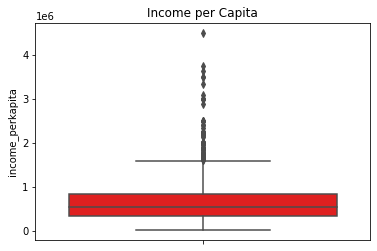

In [202]:
# Checking for outliers on the variable (Income per Capita) using boxplot

sns.boxplot(y=df["income_perkapita"], color='red').set_title("Income per Capita")
plt.show()

# the boxplot shows that there are outliers

In [203]:
# Outlier handling 

Q1=df['income_perkapita'].quantile(0.25)
Q3=df['income_perkapita'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5* IQR
Upper_Whisker = Q3 + 1.5* IQR
print(Lower_Whisker, Upper_Whisker)

325000.0
833333.3125
508333.3125
-437499.96875 1595833.28125


In [204]:
df = df[df['income_perkapita']< Upper_Whisker]

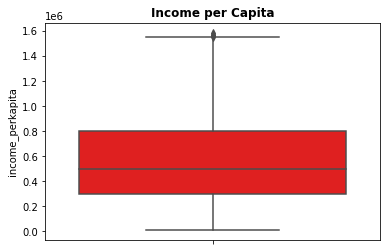

In [205]:
#Re-checking outliers

sns.boxplot(y=df["income_perkapita"], color='red').set_title("Income per Capita", fontweight='bold')
plt.show()

#Since, the variable still has few outliers, we will do outlier handling for the second time

In [206]:
#Checking outliers for the second time

Q1=df['income_perkapita'].quantile(0.25)
Q3=df['income_perkapita'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5* IQR
Upper_Whisker = Q3 + 1.5* IQR
print(Lower_Whisker, Upper_Whisker)

300000.0
800000.0
500000.0
-450000.0 1550000.0


In [207]:
df = df[df['income_perkapita']< Upper_Whisker]

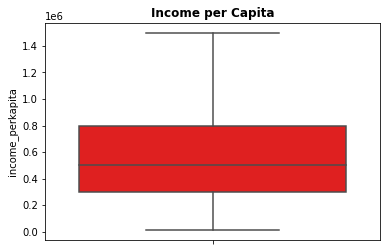

In [208]:
sns.boxplot(y=df["income_perkapita"], color='red').set_title("Income per Capita", fontweight='bold')
plt.show()

#Now, the variable has no outliers

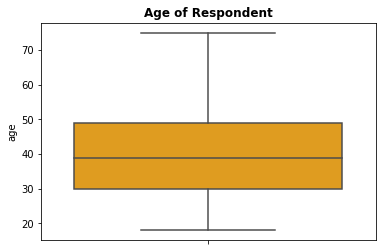

In [209]:
# Checking for outliers on the variable (age) using boxplot

sns.boxplot(y=df["age"], color='orange').set_title("Age of Respondent", fontweight='bold')
plt.show()

# the boxplot shows that there are no outliers

#**4. Exploratory Data Analysis**

##4.1 Univariate

Categorical features

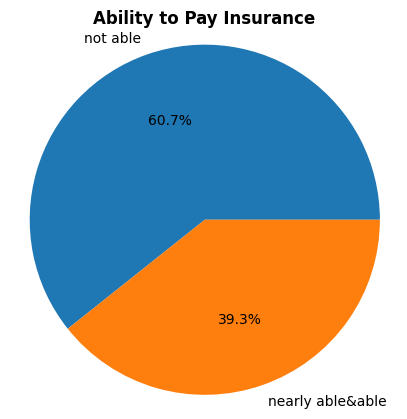

In [210]:
# A pie chart of the respondents who are able to pay

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(df.group_atp.value_counts(),labels = ['not able', 'nearly able&able'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Ability to Pay Insurance', fontweight='bold')
plt.show()


# the pie chart shows only a few respondents (25%) who are able to pay insurance policy 
# the majority (75,0%) aren't able to do so

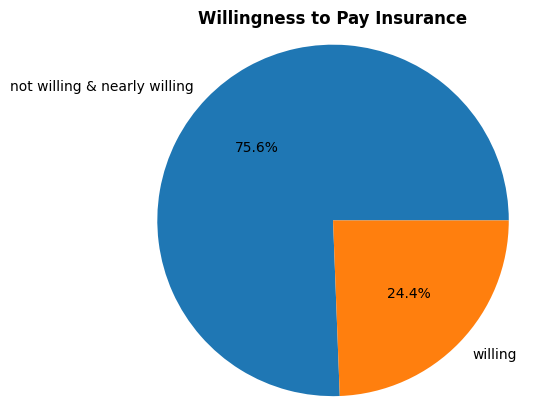

In [211]:
# A pie chart of the respondents who are willing to pay

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(df.group_wtp.value_counts(),labels = ['not willing & nearly willing', 'willing'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Willingness to Pay Insurance', fontweight='bold')
plt.show()


# the pie chart shows only a few respondents (25%) who are willing to pay insurance policy 
# the majority (75,0%) aren't willing to do so

## 4.2 Bivariate

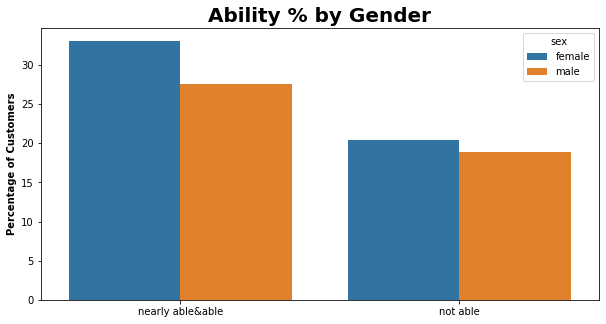

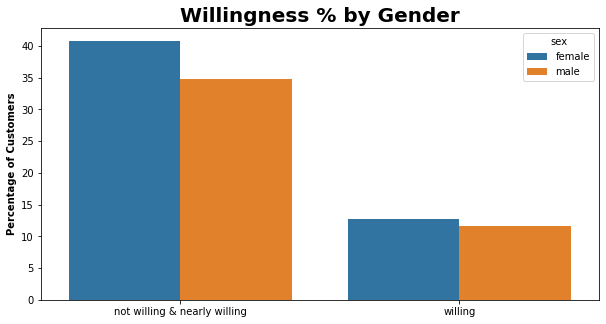

In [212]:
# Plotting a bar plot of the ability of respondent gender 

def plot_gender_pct(df):
    fig, ax = plt.subplots(figsize=(10,5))
    g = df.copy()
    g = g.groupby('group_atp')['sex'].value_counts().to_frame()
    g = g.rename({'sex':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('group_atp', y = 'pct_total', hue = 'sex', data = g)
    t.set_title('Ability % by Gender', fontsize = 20, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('Percentage of Customers', fontsize = 10, fontweight = 'bold')

    fig, ax = plt.subplots(figsize=(10,5))
    g = df.copy()
    g = g.groupby('group_wtp')['sex'].value_counts().to_frame()
    g = g.rename({'sex':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('group_wtp', y = 'pct_total', hue = 'sex', data = g)
    t.set_title('Willingness % by Gender', fontsize = 20, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('Percentage of Customers', fontsize = 10, fontweight = 'bold')
  
plot_gender_pct(df)

# The bar charts show that there were more female are nearly able (and even able) to buy insurance 

here, we found something interesting! more females who are able to buy insurance policy but they aren't willing to buy any. from this point, we're gonna explore something exciting! 

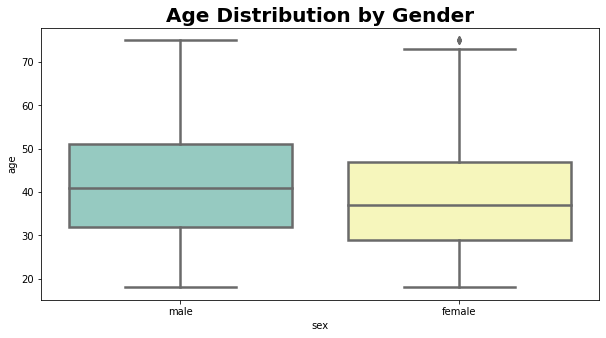

In [213]:
#who are the female group respondants?
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="sex", y="age",data=df, linewidth=2.5, palette="Set3").set_title("Age Distribution by Gender", fontweight='bold', fontdict={ 'fontsize' : 20})
plt.show()

#They are productive year group who have their own income

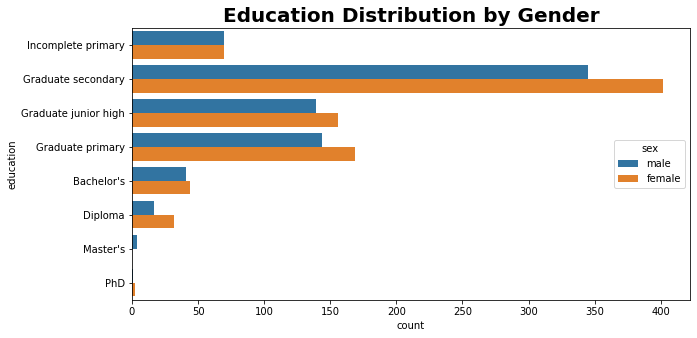

In [214]:
# Plotting a horizontal bar plot of the respondent highest level of education
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y="education", hue='sex', data=df).set_title("Education Distribution by Gender", fontweight='bold',  fontdict={ 'fontsize' : 20})
plt.show()

# the first and foremost, female respondants have higher education level than male respondants
# most respondents' highest level of education is graduate secondary
# education categories with the least number are Masters and Incomplete primary 
# the PHD category seems to be an anomaly

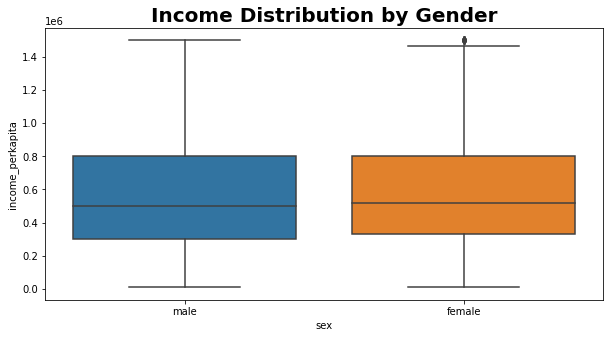

In [215]:
# Plotting a box plot of the income distribution by gender 

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="sex", y="income_perkapita", data=df).set_title("Income Distribution by Gender", fontweight='bold',  fontdict={ 'fontsize' : 20})
plt.show()

#since the income percapita between male and female are not significantly different, we knew that income percapita has no correlation with the gender variable.
#therefore, we can say that the female respondants who have more ability to buy insurance policy but they aren't willing to is because they are fully understand the cost and benefit of having insurance policy.
#in this case, we can say that the female respondants are not interesting in insurance policy because they have other options to invest in some investment products  

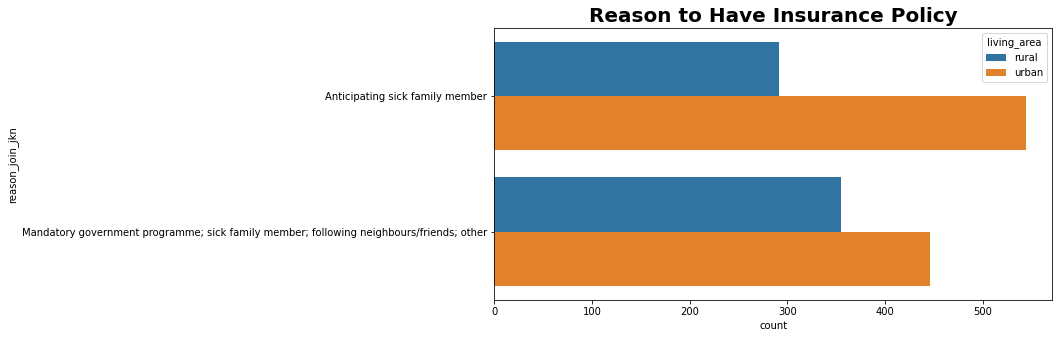

In [216]:
#Does the level of health through smoking or not smoking have a relationship with the reason for having insurance?

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y="reason_join_jkn", hue='living_area', data=df).set_title("Reason to Have Insurance Policy", fontweight='bold',  fontdict={ 'fontsize' : 20})
plt.show()

#The bar shows the reason why people buy insurance policy is because they are anticipating of being sick instead of they are being told by the government.
#The urban community seems worrier about of being sick. But   

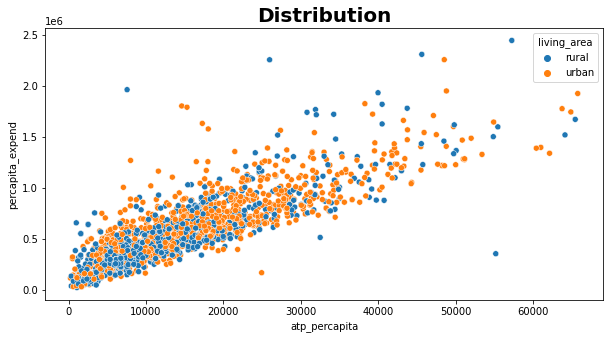

In [254]:
# ?? bikin scatter plot biar ada variasi gituu

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x="atp_percapita", y="percapita_expend", hue='living_area', data=df).set_title("Ability to Pay Based on Total Expenditure", fontweight='bold',  fontdict={ 'fontsize' : 20})
plt.show()

# The plot tells us that the more able someone to pay an insurance policy, the more she/he to spend the money

### 4.2.1 Correlation

In [218]:
# We do not need to define the pearson, it calculates by default

PCORR = df["atp_percapita"].corr(df["income_perkapita"]) 
print(PCORR)

# Since the correlation coefficent of Ability and Income is 0.4, this means that Ability and Income have a weak positive correlation

0.485556967848174


In [219]:
# Calculating the pearson coefficient of the entire dataframe

df.corr() 

,age,household_size,income_household,income_perkapita,household_total_expend,percapita_expend,expend_healthcare_hh,healthcare_pc,insurance_pc,tobacco_expend_hh,tobacco_expend_pc,atp_hh,atp_percapita,wtp_pbpu,expend_insurance_hh,a090,a091,a092,a093,a094,a095,a096,outpatient_puskesmas,outpatient_clinic,outpatient_hospital,inpatient_puskesmas,inpatient_clinic,inpatient_hospital
age,1.000000,-0.052881,-0.075408,-0.048572,-0.117522,-0.078801,0.040521,0.058465,0.008548,-0.058757,-0.032502,-0.089768,-0.075610,-0.114258,0.010100,0.045201,-0.060049,-0.013922,-0.020201,0.012864,-0.063568,0.045771,0.044808,0.010320,0.008617,-0.043490,0.012425,-0.028871
household_size,-0.052881,1.000000,0.226318,-0.296284,0.228680,-0.322533,-0.005121,-0.074082,0.015714,0.117605,-0.074571,0.232174,-0.195534,0.033385,0.058594,-0.031637,-0.005902,0.045707,0.080137,0.057745,-0.004849,0.025246,0.048998,-0.019829,0.026174,0.025789,-0.102134,0.060384
income_household,-0.075408,0.226318,1.000000,0.779322,0.549177,0.362536,0.005933,0.001091,0.147318,0.071618,0.031938,0.466245,0.354841,0.220299,0.172516,-0.219729,0.011911,0.087594,0.096516,0.065109,0.128411,0.000284,-0.050607,0.014799,0.011245,0.031493,0.039442,0.058085
income_perkapita,-0.048572,-0.296284,0.779322,1.000000,0.404235,0.587513,0.013405,0.050141,0.106135,0.020324,0.096567,0.316976,0.485557,0.187086,0.103679,-0.219371,0.003900,0.053540,0.036541,0.026226,0.132684,0.006859,-0.078822,0.013163,-0.015185,0.001561,0.105116,0.017373
household_total_expend,-0.117522,0.228680,0.549177,0.404235,1.000000,0.773192,0.078758,0.063844,0.172776,0.277750,0.214875,0.844066,0.717366,0.237334,0.194164,-0.158019,0.017475,0.042599,0.088170,0.053018,0.096705,-0.005200,-0.056911,0.045004,0.007258,0.006509,0.046427,0.038255
percapita_expend,-0.078801,-0.322533,0.362536,0.587513,0.773192,1.000000,0.080640,0.119062,0.130576,0.193483,0.277401,0.614850,0.832690,0.187076,0.119232,-0.146803,0.011759,0.023992,0.034364,0.011366,0.090364,0.002129,-0.077343,0.054089,-0.018994,-0.012414,0.118632,0.006291
expend_healthcare_hh,0.040521,-0.005121,0.005933,0.013405,0.078758,0.080640,1.000000,0.961663,0.027265,0.015322,0.020448,0.113350,0.116145,-0.024077,0.030284,-0.057040,0.023651,0.043834,-0.001737,-0.012235,0.000316,0.010809,0.016778,0.046744,0.020094,0.003322,0.121264,0.042785
healthcare_pc,0.058465,-0.074082,0.001091,0.050141,0.063844,0.119062,0.961663,1.000000,0.019005,0.013356,0.035250,0.090994,0.138562,-0.037139,0.018903,-0.064406,0.018442,0.047557,-0.006635,-0.016161,-0.000391,0.002620,0.016255,0.069957,0.013144,0.008329,0.169301,0.027981
insurance_pc,0.008548,0.015714,0.147318,0.106135,0.172776,0.130576,0.027265,0.019005,1.000000,0.041816,0.035247,0.212873,0.186654,0.070744,0.982925,-0.087513,-0.002225,0.086679,0.010935,0.021484,0.056773,-0.019313,-0.032913,0.040139,-0.021829,-0.013919,-0.018568,0.020415
tobacco_expend_hh,-0.058757,0.117605,0.071618,0.020324,0.277750,0.193483,0.015322,0.013356,0.041816,1.000000,0.905408,0.346447,0.284019,0.048748,0.042798,0.036568,0.010747,0.036466,0.001831,0.038093,0.020104,0.010158,-0.066287,0.079041,-0.050410,-0.061633,0.000715,-0.039126


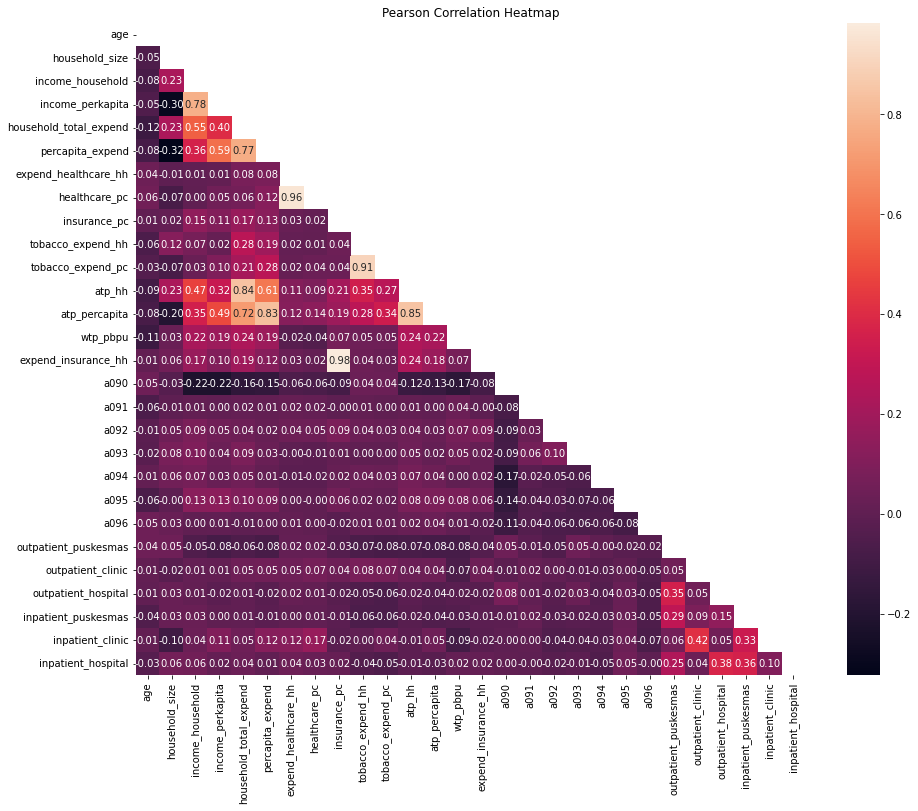

In [220]:
# Heatmap

df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

The heatmap correlation above shows:
* `expend_insurance_hh` and `insurance_pc` seem to be a good predictors. Since they have strong positive correlation (0.98), we will choose one variable to be the best predictor.   
*`atp_pc` and `atp_hh`
* `atp_hh` and `household_total_expend` also have strong correlation around 0.84 
* slightly different with `atp_percapita` and `percapita_expend` which have high correlation at 0.83
* `tobacco_expend_pc` and `tobacco_expend_hh` 0.91

##4.3 Multivariate

In [221]:
# Here we focus on analyzing more than 2 statistical variables at once.

In [222]:
# To analyse multiple categorical varibales we can turn then into dummies (zeros and ones)
#Pandas has a function which can turn a categorical variable into a series of zeros and ones, 

In [223]:
# Converting the categories into dummy variables with ones and zeros

dummy = pd.get_dummies(df[['living_area','fiscal_capacity','sex','reason_join_jkn','smoke', 'group_atp', 'group_wtp', 'satisfaction_puskesmas', 'satisfaction_familydoc', 'satisfaction_clinic', 'satisfaction_hospital']])
dummy.head()

,living_area_rural,living_area_urban,fiscal_capacity_high,fiscal_capacity_low,fiscal_capacity_medium,sex_female,sex_male,reason_join_jkn_Anticipating sick family member,reason_join_jkn_Mandatory government programme; sick family member; following neighbours/friends; other,smoke_0,smoke_smoke,group_atp_nearly able&able,group_atp_not able,group_wtp_not willing & nearly willing,group_wtp_willing,satisfaction_puskesmas_missing,satisfaction_puskesmas_satisfied and very satisfied,satisfaction_puskesmas_very not satisfied and not satisfied,satisfaction_familydoc_missing,satisfaction_familydoc_satisfied and very satisfied,satisfaction_familydoc_very not satisfied and not satisfied,satisfaction_clinic_missing,satisfaction_clinic_satisfied and very satisfied,satisfaction_clinic_very not satisfied and not satisfied,satisfaction_hospital_missing,satisfaction_hospital_satisfied and very satisfied,satisfaction_hospital_very not satisfied and not satisfied
0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
5,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [224]:
# Since we’ve created a whole new dataframe, in order to compare it to our original dataframe, we’re going to need to either merge or concatenate them to work with them properly.
# The dummy variables will be on the right side of our dataframe. As they are columns and the we concatenate them on axis=1.

# concatenating 

dff = pd.concat([df, dummy], axis = 1)
dff.head()

,province,district,living_area,fiscal_capacity,age,sex,education,household_size,reason_join_jkn,income_household,income_perkapita,household_total_expend,percapita_expend,expend_healthcare_hh,healthcare_pc,insurance_pc,tobacco_expend_hh,tobacco_expend_pc,smoke,atp_hh,atp_percapita,group_atp,wtp_pbpu,group_wtp,expend_insurance_hh,a090,a091,a092,a093,a094,a095,a096,outpatient_puskesmas,outpatient_clinic,outpatient_hospital,inpatient_puskesmas,inpatient_clinic,inpatient_hospital,satisfaction_puskesmas,satisfaction_familydoc,satisfaction_clinic,satisfaction_hospital,living_area_rural,living_area_urban,fiscal_capacity_high,fiscal_capacity_low,fiscal_capacity_medium,sex_female,sex_male,reason_join_jkn_Anticipating sick family member,reason_join_jkn_Mandatory government programme; sick family member; following neighbours/friends; other,smoke_0,smoke_smoke,group_atp_nearly able&able,group_atp_not able,group_wtp_not willing & nearly willing,group_wtp_willing,satisfaction_puskesmas_missing,satisfaction_puskesmas_satisfied and very satisfied,satisfaction_puskesmas_very not satisfied and not satisfied,satisfaction_familydoc_missing,satisfaction_familydoc_satisfied and very satisfied,satisfaction_familydoc_very not satisfied and not satisfied,satisfaction_clinic_missing,satisfaction_clinic_satisfied and very satisfied,satisfaction_clinic_very not satisfied and not satisfied,satisfaction_hospital_missing,satisfaction_hospital_satisfied and very satisfied,satisfaction_hospital_very not satisfied and not satisfied
0,51,Badung,rural,high,65,male,Incomplete primary,3,Anticipating sick family member,3500000,1.166667e+06,1668000.0,5.560000e+05,0.0,0.0,0.0,0.0,0.0,0,33500.0,11166.666992,nearly able&able,0,not willing & nearly willing,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,0,0,0,0,satisfied and very satisfied,missing,missing,missing,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
1,51,Badung,rural,high,58,male,Incomplete primary,3,Anticipating sick family member,1750000,5.833333e+05,1802000.0,6.006667e+05,0.0,0.0,0.0,0.0,0.0,0,61700.0,20566.666016,nearly able&able,0,not willing & nearly willing,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,missing,missing,missing,missing,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
3,51,Badung,urban,high,35,female,Graduate secondary,2,Anticipating sick family member,2700000,1.350000e+06,2714000.0,1.357000e+06,0.0,0.0,0.0,0.0,0.0,0,83500.0,41750.000000,nearly able&able,0,not willing & nearly willing,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,missing,missing,missing,missing,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
4,51,Badung,urban,high,28,male,Graduate secondary,2,Anticipating sick family member,2200000,1.100000e+06,1096000.0,5.480000e+05,0.0,0.0,0.0,0.0,0.0,0,30200.0,15100.000000,nearly able&able,0,not willing & nearly willing,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,missing,missing,missing,missing,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
5,51,Badung,urban,high,29,male,Graduate secondary,3,Anticipating sick family member,3200000,1.066667e+06,2158000.0,7.193333e+05,0.0,0.0,0.0,0.0,0.0,0,81000.0,27000.000000,nearly able&able,0,not willing & nearly willing,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,satisfied and very satisfied,missing,missing,missing,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0


###4.3.1 Reduction Technique: Principal Component Analysis (PCA)

In [225]:
# Preprocessing steps

# Step 1; divide the dataset into; a feature set: X, and corresponding label: y.


X = dff.drop(columns = ['province',	'district','living_area','fiscal_capacity','age','sex','education','household_size','reason_join_jkn','income_household','income_perkapita','household_total_expend','percapita_expend','expend_healthcare_hh','healthcare_pc','insurance_pc','tobacco_expend_hh','tobacco_expend_pc','smoke','atp_hh','atp_percapita','group_atp','wtp_pbpu','group_wtp','expend_insurance_hh','a090',	'a091',	'a092',	'a093',	'a094',	'a095',	'a096',	'outpatient_puskesmas',	'outpatient_clinic',	'outpatient_hospital',	'inpatient_puskesmas',	'inpatient_clinic',	'inpatient_hospital',	'satisfaction_puskesmas',	'satisfaction_familydoc',	'satisfaction_clinic',	'satisfaction_hospital'], axis = 1)
y = dff['group_atp']

In [226]:
X.head(5)

,living_area_rural,living_area_urban,fiscal_capacity_high,fiscal_capacity_low,fiscal_capacity_medium,sex_female,sex_male,reason_join_jkn_Anticipating sick family member,reason_join_jkn_Mandatory government programme; sick family member; following neighbours/friends; other,smoke_0,smoke_smoke,group_atp_nearly able&able,group_atp_not able,group_wtp_not willing & nearly willing,group_wtp_willing,satisfaction_puskesmas_missing,satisfaction_puskesmas_satisfied and very satisfied,satisfaction_puskesmas_very not satisfied and not satisfied,satisfaction_familydoc_missing,satisfaction_familydoc_satisfied and very satisfied,satisfaction_familydoc_very not satisfied and not satisfied,satisfaction_clinic_missing,satisfaction_clinic_satisfied and very satisfied,satisfaction_clinic_very not satisfied and not satisfied,satisfaction_hospital_missing,satisfaction_hospital_satisfied and very satisfied,satisfaction_hospital_very not satisfied and not satisfied
0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
5,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [227]:
y.head(5)

0    nearly able&able
1    nearly able&able
3    nearly able&able
4    nearly able&able
5    nearly able&able
Name: group_atp, dtype: object

In [228]:
# Step 2; Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [229]:
# Step 3; Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [230]:
# Step 4; Applying PCA
# Performing PCA using Python's Scikit-Learn library.

# Performing PCA using Scikit-Learn is a two-step process:
# a. Initialize the PCA class by passing the number of components to the constructor.
# b. Call the fit and then transform methods by passing the feature set to these methods. 

# The transform method returns the specified number of principal components.

from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [231]:
# Step 5: Explaining Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.12212821, 0.11880399, 0.08990952, 0.08628257, 0.07321495,
       0.07126128, 0.06756089, 0.0552628 , 0.05211801, 0.04875061,
       0.04498361, 0.04111136, 0.03625896, 0.03467501, 0.0299121 ])

In [232]:
# step 6: Using the 15 Principal Components to train our algorithm
 
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [233]:
# step 7; Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)


In [234]:
# step 8: Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# From the output we see that with only one feature, 
# the random forest algorithm is able to correctly predict 199 out of 328 instances, 
# resulting in 60.6% accuracy.

[[171  25]
 [104  28]]
Accuracy 0.6067073170731707
